* objetivo: Prediccion de precio de vehiculos utilizando regresion lineal

* datos obtenidos de https://www.kaggle.com/hellbuoy/car-price-prediction y estos a su vez con fuente en https://archive.ics.uci.edu/ml/datasets/Automobile

# Carga de datos y vista preliminar

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


In [2]:
data=pd.read_csv(r'C:\Users\56974\GitHub\python-ml-course\dataset mios\regresion lineal\CarPrice_Assignment.csv')

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#tamaño del df
data.shape

(205, 26)

In [5]:
#informacion de la data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
#separacion de la data en variables categoricas
data_categorico=data.select_dtypes('object')
data_categorico.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [7]:
#descripcion variables categoricas
data_categorico.describe()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [8]:
data_categorico.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [9]:
#separacion de la data de las variables numericas
data_numerico=data.select_dtypes('number')
data_numerico.drop('car_ID',axis=1,inplace=True)
data_numerico.head()

D:\Users\56974\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
#descripcion variables numericas
data_numerico.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# data cleaning

In [11]:
#quitando el ID del auto
#data.drop('car_ID',axis=1,inplace=True)

In [12]:
#CarName contiene datos muy especificos, se limpiara para generalizar hacia las marcas
a=data_categorico['CarName'].str.split(' ',expand=True)

In [13]:
a.columns=['CarName','otra','otra2','otra3','otra4']
a.head()

,CarName,otra,otra2,otra3,otra4
0,alfa-romero,giulia,None,None,None
1,alfa-romero,stelvio,None,None,None
2,alfa-romero,Quadrifoglio,None,None,None
3,audi,100,ls,None,None
4,audi,100ls,None,None,None


In [14]:
#reemplazando solo la primera columna de los nombres
data_categorico['CarName'] = a['CarName']
data_categorico.head()

D:\Users\56974\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [15]:
#se ven algunos errores de tipeos en las marcas como "maxda", deberia ser "mazda"
data_categorico['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [16]:
#reemplazando los valores erroneos por los correctos
data_categorico['CarName']=data['CarName'].replace({"maxda": 'mazda', "nissan": 'Nissan','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'})

D:\Users\56974\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
data_categorico['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [18]:
data_categorico.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [19]:
#comprobaremos que no hayan columnas repetidas en el dataframe
data[data.duplicated(keep=False)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [20]:
#revision de la variable symboling ya que en la descripcion aparecia como categorica
data['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [21]:
data['symboling'].dtype

dtype('int64')

In [22]:
#cambio de variables categoricas a numericas
#encoder=preprocessing.LabelEncoder() con este metodo podia transformar solo una columna a la vez
#con el siguiente metodo puedo transformar varias columnas de una sola vez
encoder=data_categorico.apply(LabelEncoder().fit_transform)
encoder

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,2,1,0,1,0,2,0,0,2,5
1,3,1,0,1,0,2,0,0,2,5
2,1,1,0,1,2,2,0,5,3,5
3,4,1,0,0,3,1,0,3,2,5
4,5,1,0,0,3,0,0,3,1,5
...,...,...,...,...,...,...,...,...,...,...
200,139,1,0,0,3,2,0,3,2,5
201,138,1,1,0,3,2,0,3,2,5
202,140,1,0,0,3,2,0,5,3,5
203,142,0,1,0,3,2,0,3,3,3


In [23]:
data_categorico.describe()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [24]:
#al comparar los valores maximos de cada columna notamos como la transformacion de la variable categorica funciono bien
#por ejemplo en data_categorico vemos que carname tiene 22 valores unicos y en encore vemos que el maximo es 21, es decir,
#se transformaron esos 22 valores en valores numericos entre 0-21
encoder.describe()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,77.209756,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,3.014634,2.117073,3.253659
std,41.014583,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,1.054765,0.795792,2.013204
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,3.000000,2.000000,1.000000
50%,80.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,3.000000,2.000000,5.000000
75%,115.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,3.000000,2.000000,5.000000
max,146.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,6.000000,6.000000,7.000000


In [25]:
#finalmente unimos los 2 dataframe encoder y data_numerico para tener el dataframe final para la regresion
#recordar axis=0(por defecto) junta uno sobre otro, axis=1 los junta uno al lado del otro
df =pd.concat([encoder, data_numerico],axis=1)
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,5,3,5,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,1,0,0,3,1,0,3,2,5,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,1,0,0,3,0,0,3,1,5,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
df.describe()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,77.209756,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,3.014634,2.117073,3.253659,...,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,41.014583,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,1.054765,0.795792,2.013204,...,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,44.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,3.000000,2.000000,1.000000,...,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,80.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,3.000000,2.000000,5.000000,...,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,115.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,3.000000,2.000000,5.000000,...,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,146.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,6.000000,6.000000,7.000000,...,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [27]:
df.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [28]:
#vemos que la concatenacion se realizo bien, hay 205 elementos y 25 columnas (una menos porque se elimino car_id)
data.shape

(205, 26)

# visualizacion  

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146]), <a list of 147 Text xticklabel objects>)

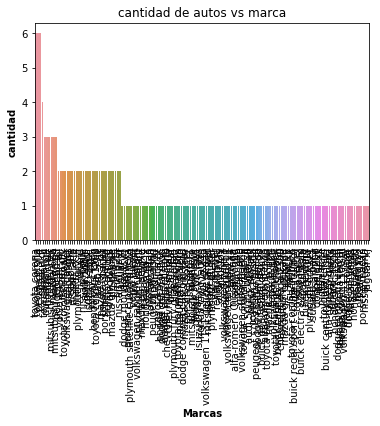

In [29]:
#cantidad de autos por marca
grafica1=sns.countplot(x='CarName',data=data,order = data['CarName'].value_counts().index)
grafica1.title.set_text('cantidad de autos vs marca')
plt.xlabel("Marcas",fontweight = 'bold')
plt.ylabel("cantidad",fontweight = 'bold')
plt.xticks(rotation=90)

Text(0, 0.5, 'cantidad')

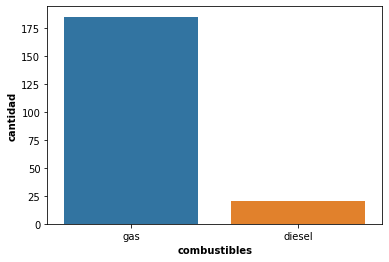

In [30]:
# de forma similar con otras variables de interes
sns.countplot(x='fueltype',data=data)
plt.xlabel("combustibles",fontweight = 'bold')
plt.ylabel("cantidad",fontweight = 'bold')

Text(0, 0.5, 'cantidad de autos con dichas puertas')

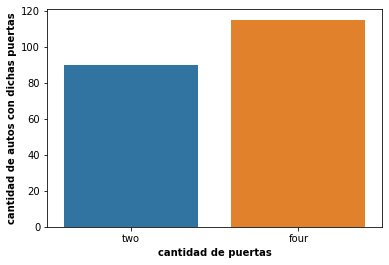

In [31]:
sns.countplot(x='doornumber',data=data)
plt.xlabel("cantidad de puertas",fontweight = 'bold')
plt.ylabel("cantidad de autos con dichas puertas",fontweight = 'bold')

Text(0, 0.5, 'Precio')

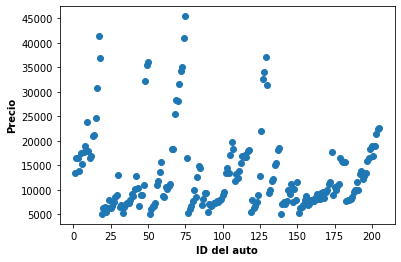

In [32]:
#grafico de dispercion de cada auto vs su precio
plt.scatter(data['car_ID'],data['price'])
plt.xlabel("ID del auto",fontweight = 'bold')
plt.ylabel("Precio",fontweight = 'bold')

Text(0, 0.5, 'Precio')

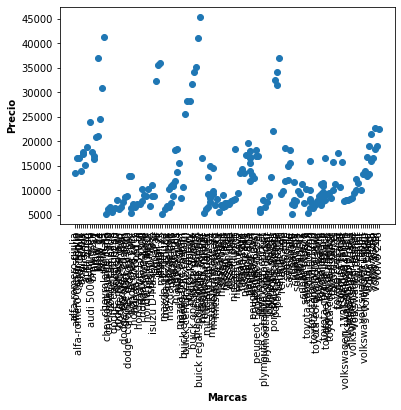

In [33]:
#grafico de dispercion de marca vs precio
plt.scatter(data['CarName'],data['price'])
plt.xticks(rotation=90)
plt.xlabel("Marcas",fontweight = 'bold')
plt.ylabel("Precio",fontweight = 'bold')

* la gran diferencia de precios entre autos de una misma marca corresponde a  los dsitintos modelos de dicha marca que se debe recordar fueron simplificados para utilizarlos en el calculo de la regresion lineal

In [34]:
#regla de sturges para determinar bins del histograma
c=math.ceil(1+math.log2(205))
c

9

Text(0.5, 0, 'precios')

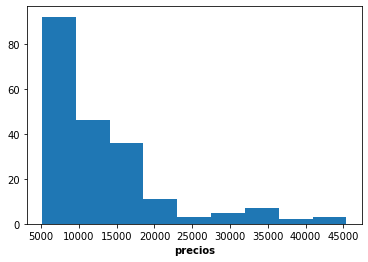

In [35]:
#histograma de los precios 
plt.hist(data['price'],bins=9)
plt.xlabel("precios",fontweight = 'bold')


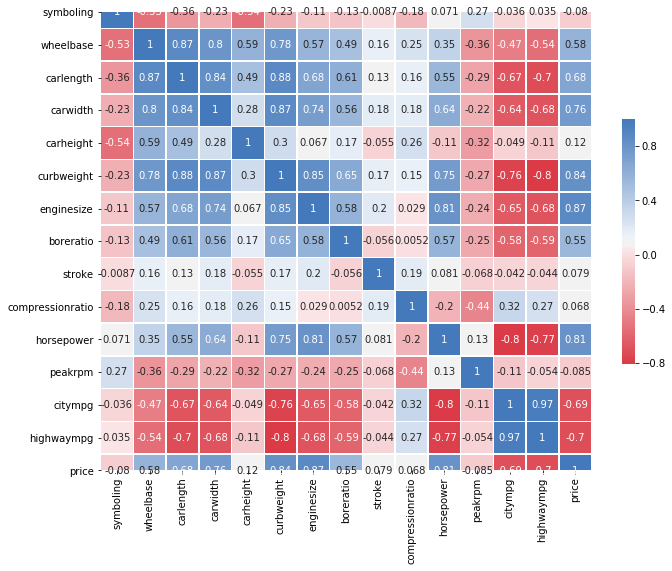

In [36]:
#grafica de correlacion entre variables numericas
corr = data_numerico.corr()
cmap = sns.diverging_palette(10, 250, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax,annot=True)

* Si corr < 0 Hay correlación negativa : las dos variables se correlacionan en sentido inverso.A valores altos de una de ellas le suelen corresponder valor bajos de la otra y viceversa.Cuánto más próximo a -1 esté el coeficiente de correlación más patente será esta covariación extrema (recuadros mas rojos).

* Si corr > 0 Hay correlación positiva: las dos variables se correlacionan en sentido directo.A valores altos de una le corresponden valores altos de la otra e igualmente con los valores bajos.Cuánto más próximo a +1 esté el coeficiente de correlación más patente será esta covariación (recuadros azules).

* Si corr = 0 se dice que las variables están incorrelacionadas: no puede establecerse ningún sentido de covariación (recuadros blancos).

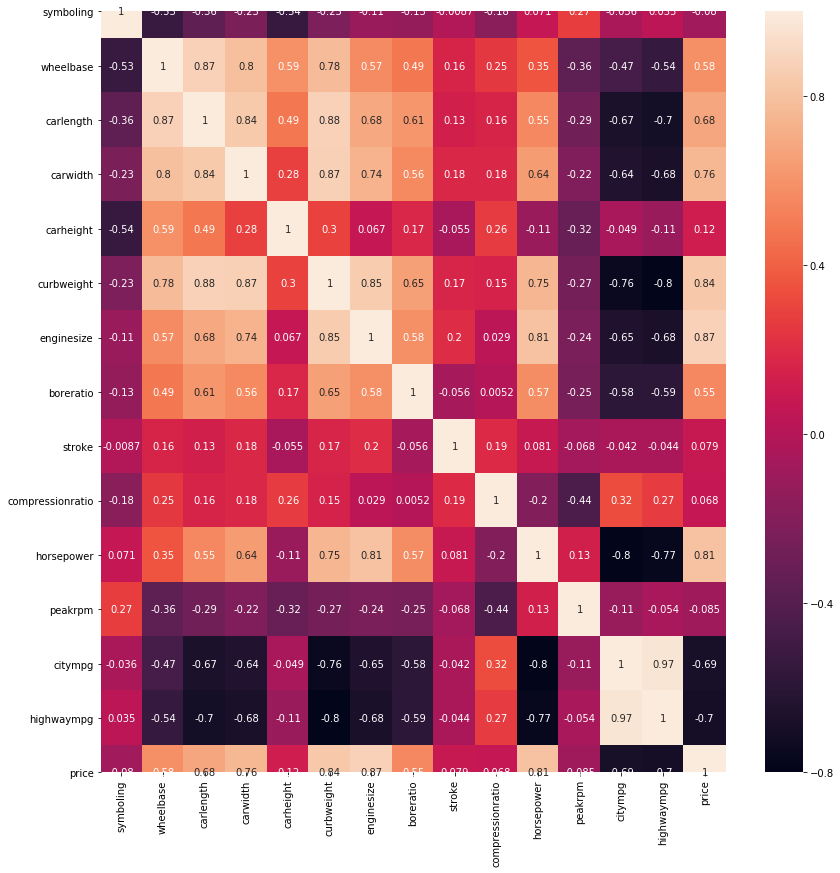

In [37]:
#OTRO grafico de calor con su correlacion 
fig, ax = plt.subplots(figsize=(14,14)) 

sns.heatmap(data_numerico.corr(),annot=True)

Text(0, 0.5, 'Frecuencias')

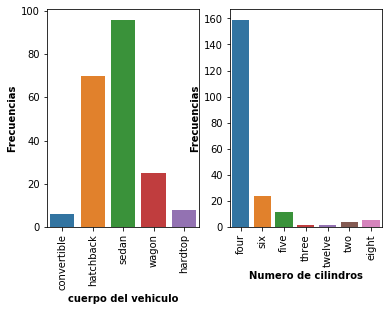

In [38]:
plt.subplot(1,2,1)
sns.countplot(x='carbody',data=data)
plt.xticks(rotation=90)
plt.xlabel("cuerpo del vehiculo",fontweight = 'bold')
plt.ylabel("Frecuencias",fontweight = 'bold')

plt.subplot(1,2,2)
sns.countplot(x='cylindernumber',data=data)
plt.xticks(rotation=90)
plt.xlabel("Numero de cilindros",fontweight = 'bold')
plt.ylabel("Frecuencias",fontweight = 'bold')

# Modelo Regresion lineal 

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [40]:
#seleccion de columnas
df.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [41]:
X=df[['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
X.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,2,1,0,1,0,2,0,0,2,5,...,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,1,0,1,0,2,0,0,2,5,...,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,1,0,1,2,2,0,5,3,5,...,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,4,1,0,0,3,1,0,3,2,5,...,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,5,1,0,0,3,0,0,3,1,5,...,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [42]:
Y=df['price']
Y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [43]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3, random_state=42)

In [44]:
X_train.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
177,125,1,0,0,2,1,0,3,2,5,...,53.9,2458,122,3.31,3.54,8.7,92,4200,27,32
75,62,1,1,1,2,2,0,3,2,5,...,54.8,2910,140,3.78,3.12,8.0,175,5000,19,24
174,113,0,1,0,3,1,0,3,2,3,...,54.9,2480,110,3.27,3.35,22.5,73,4500,30,33
31,43,1,0,1,2,1,0,3,2,0,...,50.8,1819,92,2.91,3.41,9.2,76,6000,31,38
12,11,1,0,1,3,2,0,3,3,5,...,54.3,2710,164,3.31,3.19,9.0,121,4250,21,28


In [45]:
Y_train.head()

177    11248.0
75     16503.0
174    10698.0
31      6855.0
12     20970.0
Name: price, dtype: float64

* vemos que los indices coinciden en ambos datos de entrenamiento por lo tanto el split se hizo de forma correcta

In [46]:
lrm=LinearRegression()
lrm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
predicciones = lrm.predict(X_test)

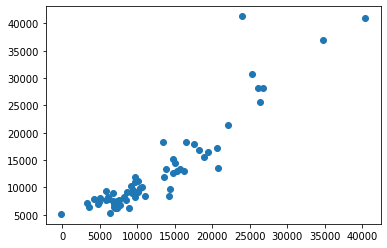

In [48]:
plt.scatter(predicciones,Y_test)

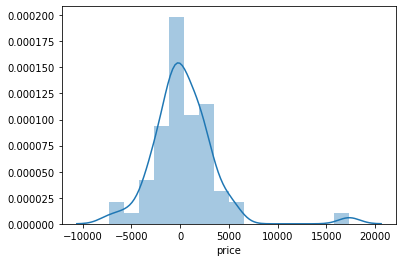

In [49]:
error= Y_test-predicciones
sns.distplot(error)

In [50]:
#evaluacion del modelo

In [51]:
from sklearn import metrics

In [52]:
print("MAE:", metrics.mean_absolute_error(Y_test, predicciones))
print('MSE:', metrics.mean_squared_error(Y_test, predicciones))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predicciones)))

MAE: 2196.0531111239134
MSE: 11091618.680797668
RMSE: 3330.4081853126754


* Falta ponerque significa cada valor si es bueno malo o normal y como mejorarlo, ver otros modelos quitando variables asignando p valores y generalidad del modelo, para terminar version final.